In [111]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [112]:
import requests

- Use the requests.get function to send an HTTP GET request:
- response = requests.get(url)
- response will contain the server's response to your request, including the content of the web page or resource you requested.
- You can then access various properties and data from the response object, such as the status code, headers, and the content of the web page. For example:
- print(response.status_code)  # Print the HTTP status code (e.g., 200 for success).
- print(response.headers)      # Print the response headers.
- print(response.text)         # Print the content of the web page as a string.


In [113]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav")

<Response [403]>

In [114]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav").text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;a7055a68&#46;1697813944&#46;1112c33d\n</BODY>\n</HTML>\n'

**when response 403 that means , there is file called robot.txt  , which doesnt allow bots to directly access website , so we have to disguise as a person and to do that use the below headers as parameter in requests.get()**

In [115]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [116]:
webpage = requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav",headers = headers).text

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <!-- <script src="https://www.googletagmanager.com/gtag/js" async></script> -->\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n
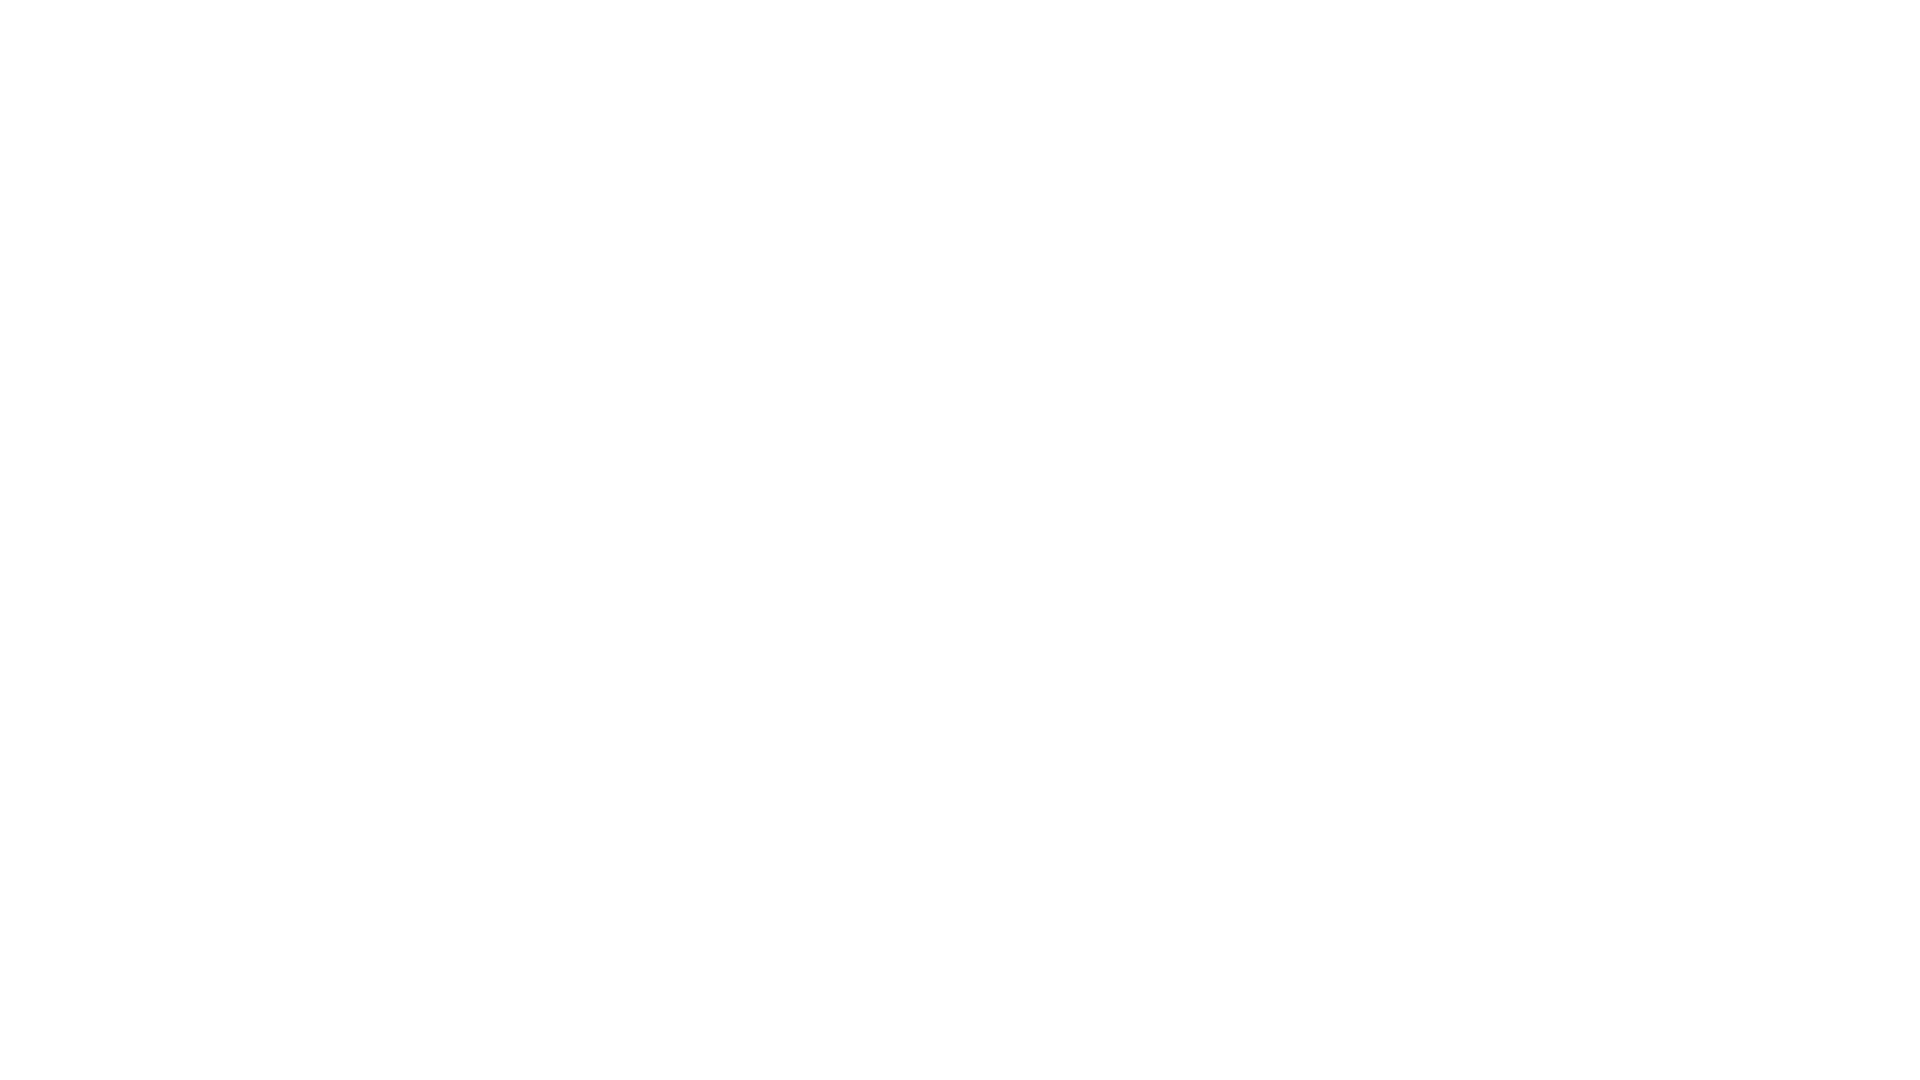
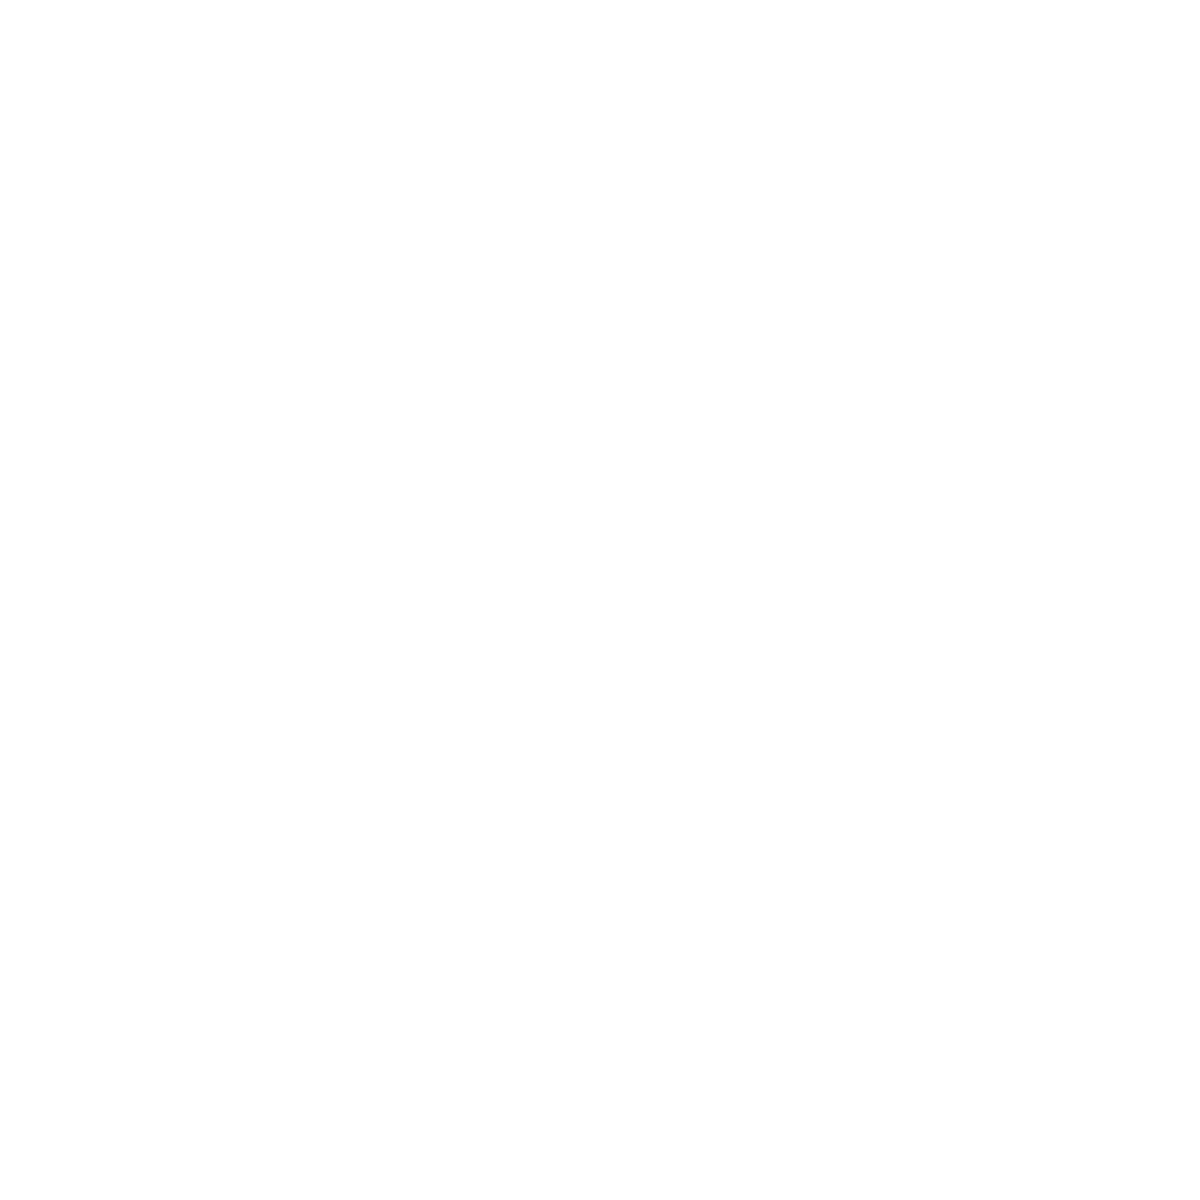

In [117]:
webpage

pass the webpage to beautifulsoup

In [118]:
soup = BeautifulSoup(webpage , "lxml")

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- <script src="https://www.googletagmanager.com/gtag/js" async></script> -->
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>
<title>List of companies in India | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n
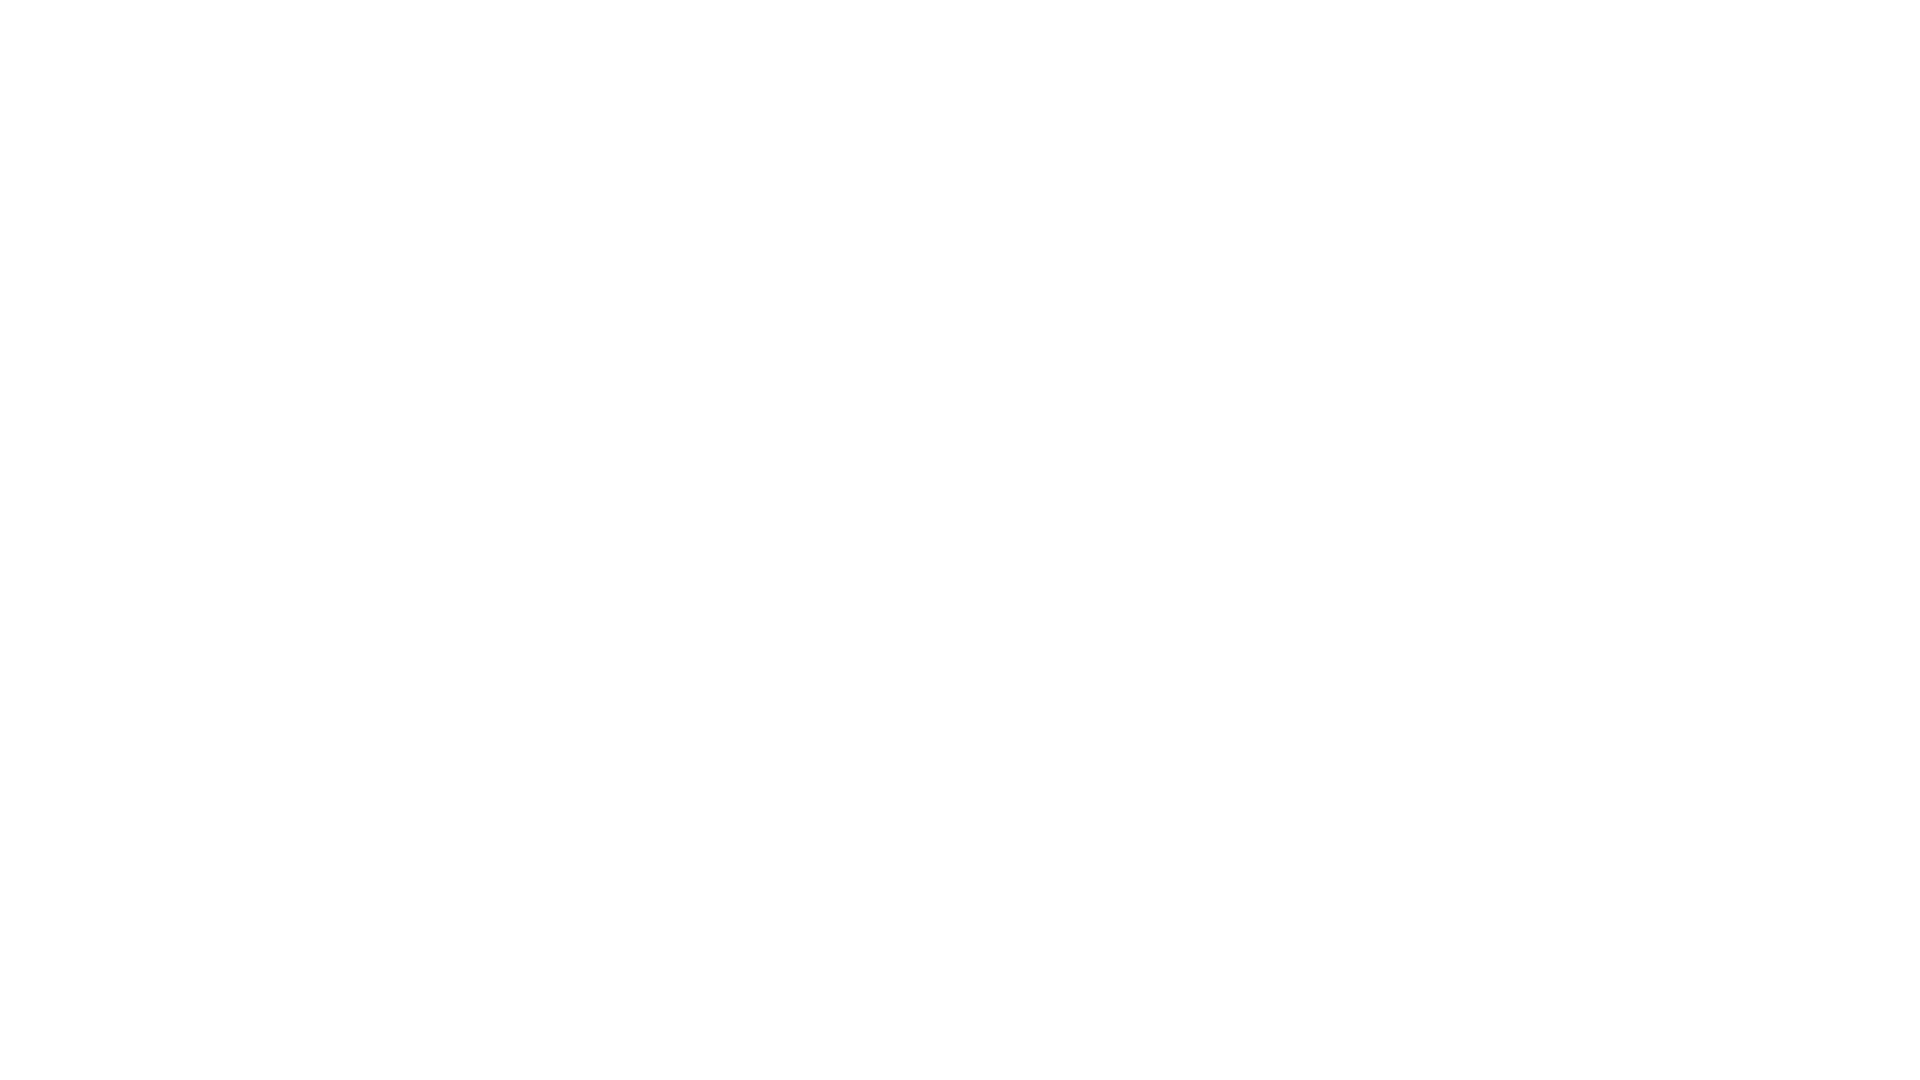
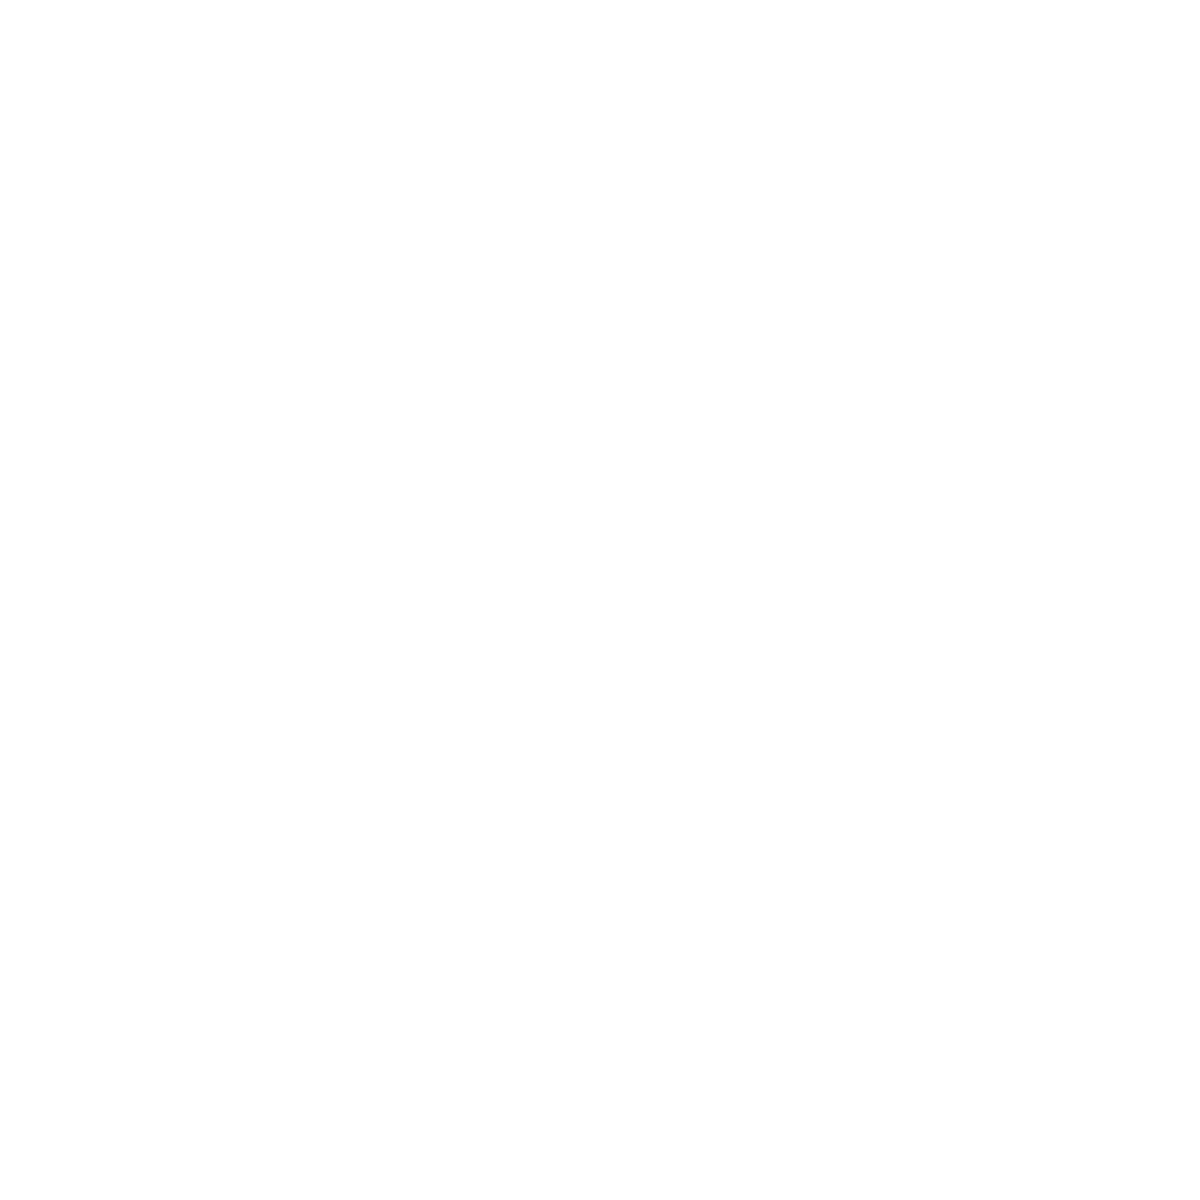

In [119]:
soup

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- <script src="https://www.googletagmanager.com/gtag/js" async></script> -->
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_i
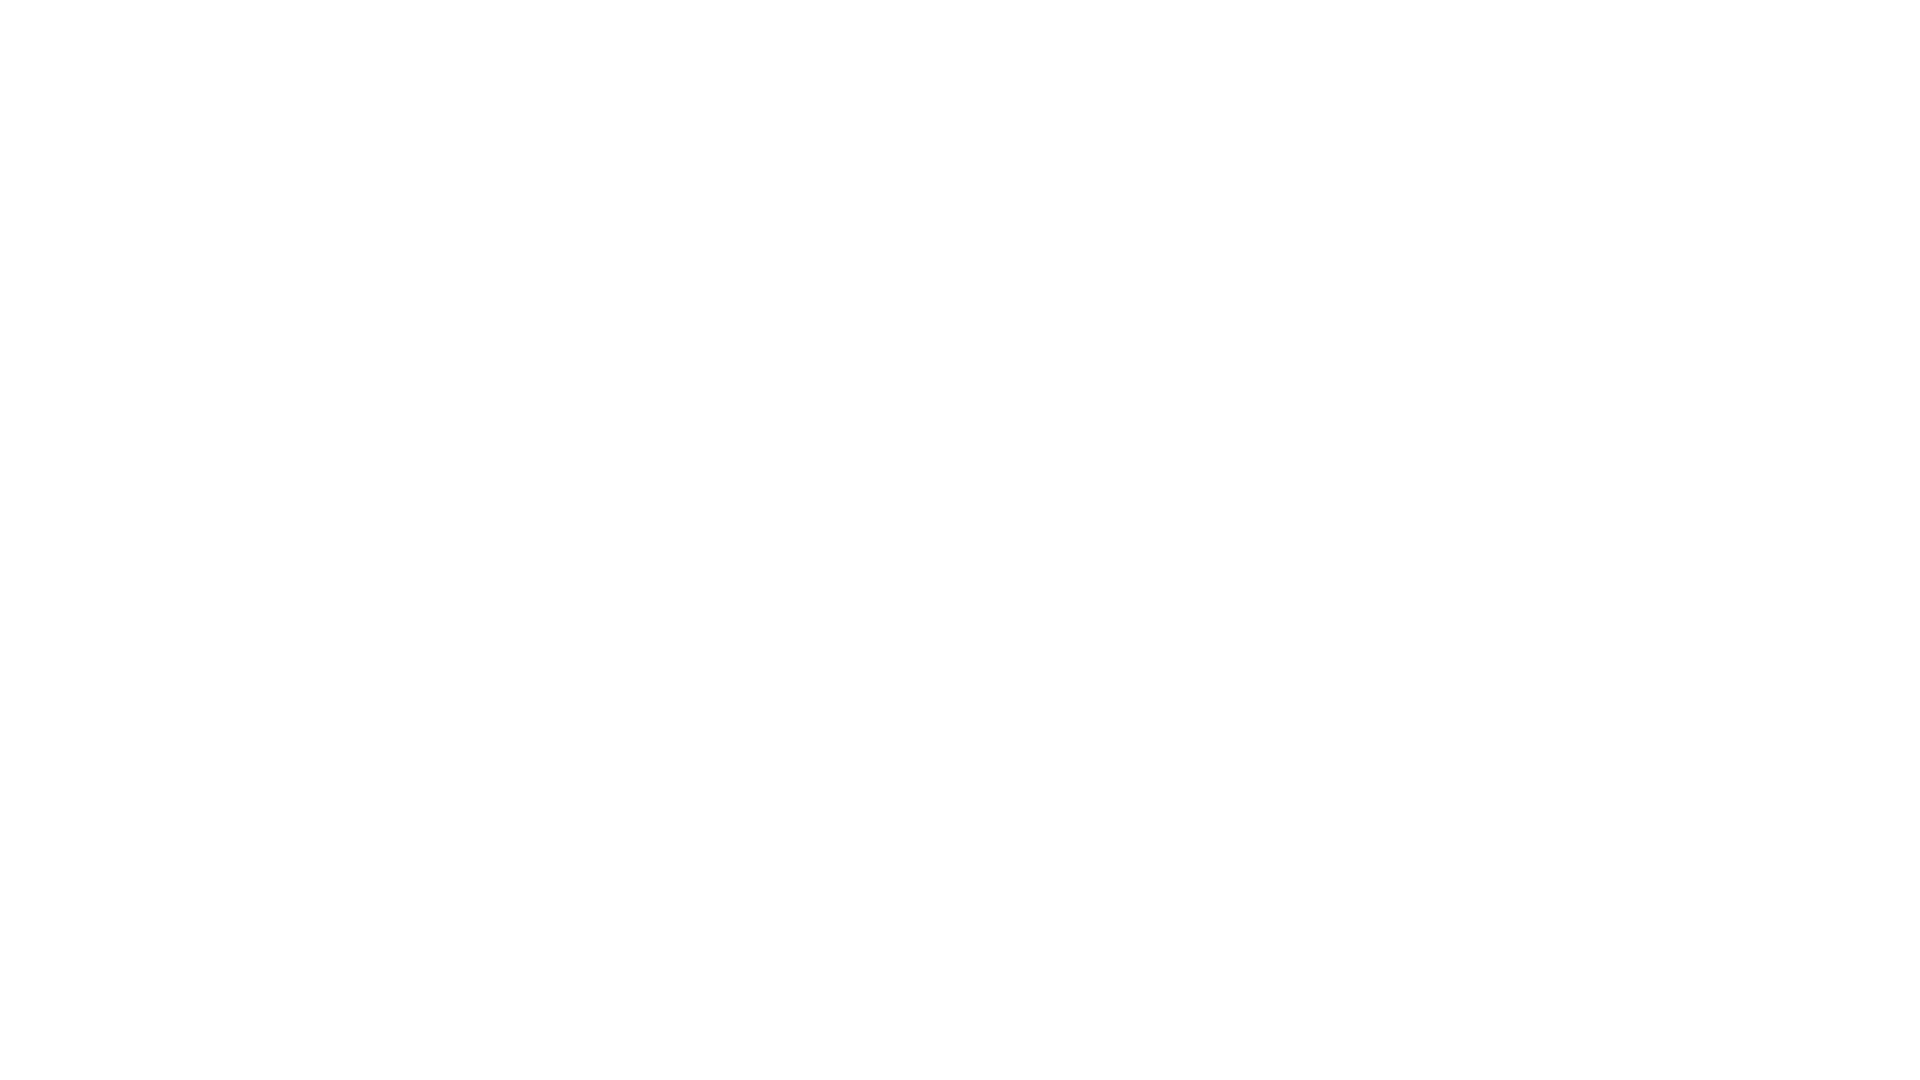
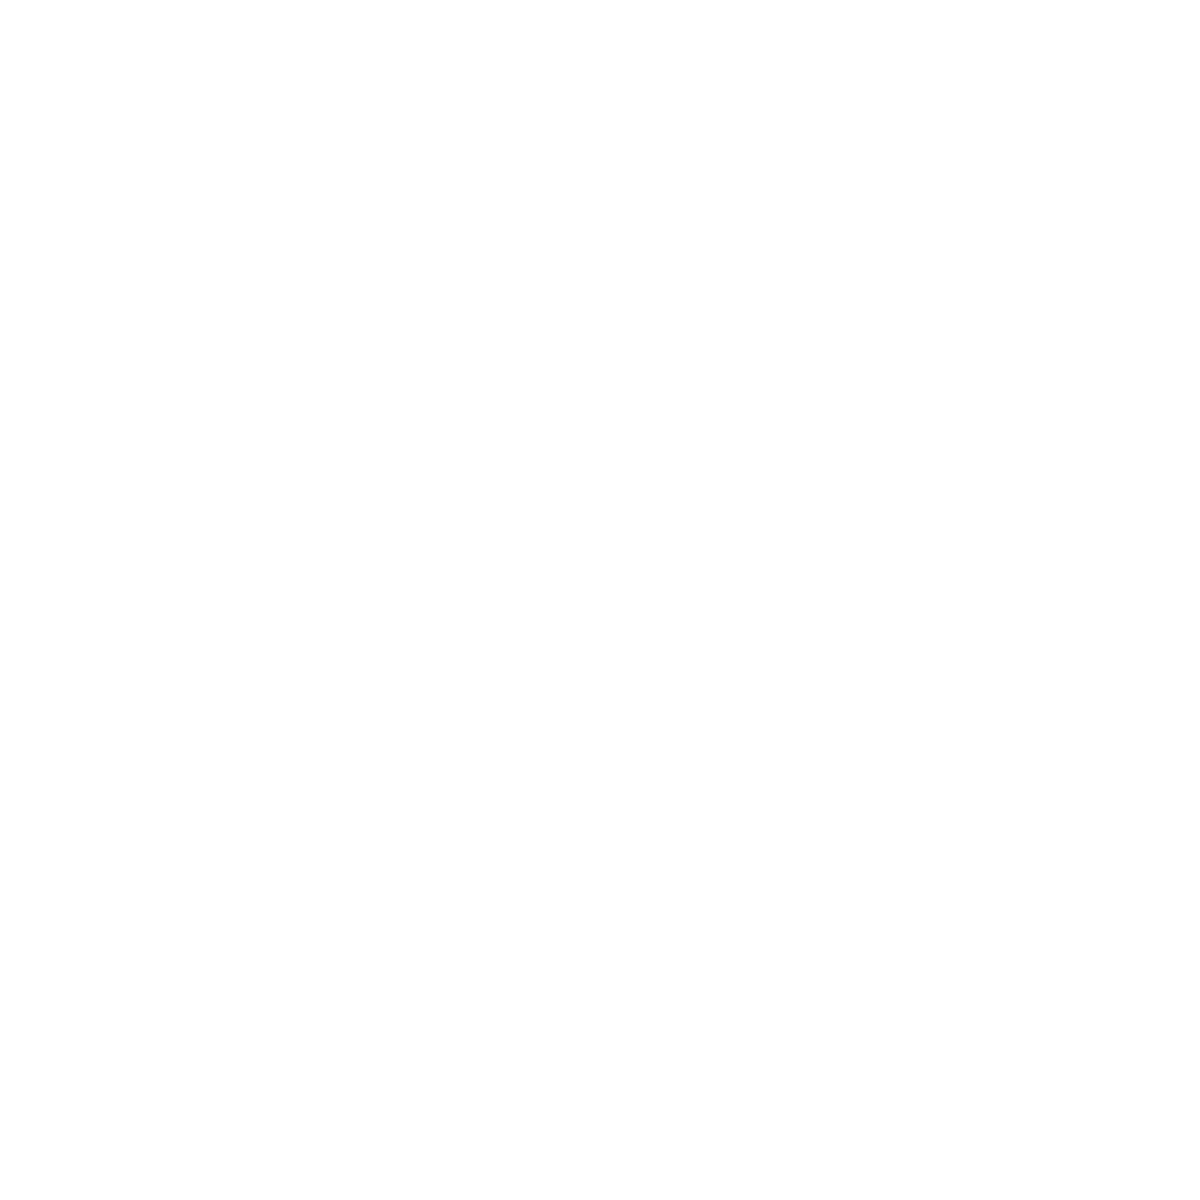

In [120]:
print(soup.prettify())

In [121]:
soup.find_all("h1") #----> list that has one element

[<h1 class="companyListing__title">
 							List of companies in India
 						</h1>]

In [122]:
soup.find_all("h1")[0] #----> accessing the 0th element , but we dont want tags , only want text

<h1 class="companyListing__title">
							List of companies in India
						</h1>

In [123]:
soup.find_all("h1")[0].text #to remove special characters in the text or space use strip function

'\n\t\t\t\t\t\t\tList of companies in India\n\t\t\t\t\t\t'

In [124]:
soup.find_all("h1")[0].text.strip()

'List of companies in India'

In [125]:
soup.find_all("h2")

[<h2 class="companyCardWrapper__companyName" title="TCS">
 										TCS
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Accenture">
 										Accenture
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Cognizant">
 										Cognizant
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Wipro">
 										Wipro
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="ICICI Bank">
 										ICICI Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HDFC Bank">
 										HDFC Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Infosys">
 										Infosys
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Capgemini">
 										Capgemini
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Tech Mahindra">
 										Tech Mahindra
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HCLTech">
 										HCLTech
 									</h2>

In [126]:
len(soup.find_all("h2"))

24

In [127]:
for i in soup.find_all("h2"):
    print(i.text)


										TCS
									

										Accenture
									

										Cognizant
									

										Wipro
									

										ICICI Bank
									

										HDFC Bank
									

										Infosys
									

										Capgemini
									

										Tech Mahindra
									

										HCLTech
									

										Genpact
									

										Axis Bank
									

										Concentrix Corporation
									

										Amazon
									

										Reliance Jio
									

										IBM
									

										Larsen & Toubro Limited
									

										Reliance Retail
									

										HDB Financial Services
									

										Teleperformance
									

			Companies by  Industry
		

			Companies by  Locations
		

			Companies by  Type
		

			Companies by  Badges
		


In [128]:
for i in soup.find_all("h2",class_ = "companyCardWrapper__companyName"):
    print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
ICICI Bank
HDFC Bank
Infosys
Capgemini
Tech Mahindra
HCLTech
Genpact
Axis Bank
Concentrix Corporation
Amazon
Reliance Jio
IBM
Larsen & Toubro Limited
Reliance Retail
HDB Financial Services
Teleperformance


In [129]:
len(soup.find_all("h2",class_ = "companyCardWrapper__companyName"))

20

In [130]:
companies = []
for i in soup.find_all("h2",class_ = "companyCardWrapper__companyName"):
    companies.append(i.text.strip())

In [131]:
companies

['TCS',
 'Accenture',
 'Cognizant',
 'Wipro',
 'ICICI Bank',
 'HDFC Bank',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'HCLTech',
 'Genpact',
 'Axis Bank',
 'Concentrix Corporation',
 'Amazon',
 'Reliance Jio',
 'IBM',
 'Larsen & Toubro Limited',
 'Reliance Retail',
 'HDB Financial Services',
 'Teleperformance']

In [132]:
# extracting rating
soup.find_all("span")  #---->rating is in span tag but there are multiple hence specify class too 

[<span class="plus">+</span>,
 <span class="contributeDropdown__formsHeaderTxt">You can choose to be
 						<span class="contributeDropdown__formsHeaderTxtClr">anonymous</span></span>,
 <span class="contributeDropdown__formsHeaderTxtClr">anonymous</span>,
 <span class="badge" id="badge-count" style="display:none;"></span>,
 <span>Companies</span>,
 <span>Reviews</span>,
 <span>Salaries</span>,
 <span>Interviews</span>,
 <span data-v-3f980148="">All Filters
 					
 				</span>,
 <span class="filterWrapper__chipSubMenu filterWrapper__chipSubMenu0" data-v-3f980148=""><!-- --></span>,
 <span class="filterWrapper__chipSubMenu filterWrapper__chipSubMenu1" data-v-3f980148=""><!-- --></span>,
 <span class="filterWrapper__chipSubMenu filterWrapper__chipSubMenu3" data-v-3f980148=""><!-- --></span>,
 <span class="filterWrapper__chipSubMenu filterWrapper__chipSubMenu4" data-v-3f980148=""><!-- --></span>,
 <span class="filterWrapper__chipSubMenu filterWrapper__chipSubMenu5" data-v-3f980148=""><!-- 

In [133]:
soup.find_all("span" , class_ = "companyCardWrapper__companyRatingValue")

[<span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">4.1</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">4.0</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.7</span>,
 <span class="companyCardWrapper__companyRatingValue">3.7</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">4.1</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span cla

In [134]:
len(soup.find_all("span" , class_ = "companyCardWrapper__companyRatingValue"))

20

In [135]:
for i in soup.find_all("span" , class_ = "companyCardWrapper__companyRatingValue"):
    print(i.text.strip())

3.8
4.1
3.9
3.8
4.0
3.9
3.9
3.8
3.7
3.7
3.9
3.8
3.9
4.1
3.9
4.1
4.0
3.9
4.0
3.6


In [149]:
ratings

['3.8',
 '4.1',
 '3.9',
 '3.8',
 '4.0',
 '3.9',
 '3.9',
 '3.8',
 '3.7',
 '3.7',
 '3.9',
 '3.8',
 '3.9',
 '4.1',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '4.0',
 '3.6']

In [136]:
len(soup.find_all("span",class_ = 'companyCardWrapper__ActionCount'))

120

In [137]:
content = []
for i in soup.find_all("span",class_ = 'companyCardWrapper__ActionCount'):
    content.append(i.text)

In [138]:
content

['66.5k',
 '733.8k',
 '5.5k',
 '196',
 '10.9k',
 '65',
 '42.4k',
 '512.8k',
 '3.8k',
 '5.4k',
 '6.8k',
 '38',
 '38.3k',
 '496.1k',
 '3.3k',
 '527',
 '5.6k',
 '47',
 '35.3k',
 '369.4k',
 '3.3k',
 '412',
 '4.7k',
 '48',
 '30.8k',
 '135.8k',
 '1.7k',
 '214',
 '3.6k',
 '22',
 '30.5k',
 '122.9k',
 '1.4k',
 '380',
 '3.1k',
 '17',
 '29k',
 '412.8k',
 '4.5k',
 '781',
 '4.8k',
 '79',
 '26.9k',
 '336.1k',
 '2.3k',
 '665',
 '3.8k',
 '26',
 '25.2k',
 '235.9k',
 '2.2k',
 '1.2k',
 '3.4k',
 '40',
 '24.7k',
 '251.5k',
 '2.2k',
 '641',
 '3.9k',
 '25',
 '24.2k',
 '176.3k',
 '1.8k',
 '748',
 '3.5k',
 '28',
 '20.3k',
 '94.2k',
 '996',
 '307',
 '2.1k',
 '22',
 '20k',
 '98.4k',
 '983',
 '173',
 '3.2k',
 '23',
 '19.2k',
 '116.6k',
 '3.1k',
 '699',
 '4k',
 '32',
 '18.5k',
 '64.1k',
 '1.1k',
 '168',
 '2.5k',
 '28',
 '18.5k',
 '197.4k',
 '1.4k',
 '2.5k',
 '2.6k',
 '14',
 '17.3k',
 '76.5k',
 '958',
 '151',
 '2.8k',
 '25',
 '16.7k',
 '53.2k',
 '1k',
 '265',
 '1.9k',
 '58',
 '16.3k',
 '48.8k',
 '522',
 '125',
 '1.

In [139]:
ratings = []
for i in soup.find_all("span" , class_ = "companyCardWrapper__companyRatingValue"):
    ratings.append(i.text.strip())

In [141]:
grouped_lists = [content[i:i+6] for i in range(0, len(content), 6)]

# Print the grouped lists
n_reviews = []
n_sal = []
n_interviews = []
n_jobs = []
n_benefits = []
n_photos = []
for group in grouped_lists:
    n_reviews.append(group[0])
    n_sal.append(group[1])
    n_interviews.append(group[2])
    n_jobs.append(group[3])
    n_benefits.append(group[4])
    n_photos.append(group[5])

In [147]:
highly_rated_for = []
for i in soup.find_all("span",class_ = "companyCardWrapper__ratingValues"):
    highly_rated_for.append(i.text)

In [148]:
highly_rated_for

['Job Security, Work Life Balance, Company Culture',
 'Promotions / Appraisal, Salary & Benefits',
 'Company Culture, Job Security, Skill Development / Learning',
 'Skill Development / Learning, Job Security',
 'Job Security, Skill Development / Learning',
 'Job Security, Skill Development / Learning, Company Culture',
 'Job Security, Skill Development / Learning',
 'Job Security, Company Culture, Skill Development / Learning',
 'Job Security, Work Life Balance, Company Culture',
 'Job Security',
 'Promotions / Appraisal',
 'Job Security, Skill Development / Learning, Work Life Balance',
 'Job Security',
 'Job Security, Company Culture',
 'Company Culture, Salary & Benefits, Work Life Balance',
 'Job Security, Skill Development / Learning',
 'Job Security, Work Life Balance, Skill Development / Learning',
 'Job Security, Skill Development / Learning',
 'Skill Development / Learning, Job Security',
 'Skill Development / Learning, Job Security, Company Culture']

In [152]:
df=pd.DataFrame({'name':companies,
    'rating':ratings,
    'reviews':n_reviews,
    'N_jobs':n_jobs,
    'N_interviews':n_interviews,
    'n_benefits':n_benefits,
    'n_photos':n_photos
    ,'n_sal':n_sal
    })
  

In [153]:
df

,name,rating,reviews,N_jobs,N_interviews,n_benefits,n_photos,n_sal
0,TCS,3.8,66.5k,196,5.5k,10.9k,65,733.8k
1,Accenture,4.1,42.4k,5.4k,3.8k,6.8k,38,512.8k
2,Cognizant,3.9,38.3k,527,3.3k,5.6k,47,496.1k
3,Wipro,3.8,35.3k,412,3.3k,4.7k,48,369.4k
4,ICICI Bank,4.0,30.8k,214,1.7k,3.6k,22,135.8k
5,HDFC Bank,3.9,30.5k,380,1.4k,3.1k,17,122.9k
6,Infosys,3.9,29k,781,4.5k,4.8k,79,412.8k
7,Capgemini,3.8,26.9k,665,2.3k,3.8k,26,336.1k
8,Tech Mahindra,3.7,25.2k,1.2k,2.2k,3.4k,40,235.9k
9,HCLTech,3.7,24.7k,641,2.2k,3.9k,25,251.5k


In [157]:
list(soup.find_all('span',class_="companyCardWrapper__interLinking").text)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [175]:
soup.find('span',class_="companyCardWrapper__interLinking").text.strip().split('|')

['IT Services & Consulting ',
 ' 1 Lakh+ Employees ',
 ' Public ',
 ' 55 years old ',
 ' Mumbai +297 more']

In [181]:
c_domain = []
num_employee = []
c_type = []
c_age = []

for i in soup.find_all('span',class_="companyCardWrapper__interLinking"):
    content = i.text.strip().split('|')
    c_domain.append(content[0])
    num_employee.append(content[1])
    c_type.append(content[2])
    c_age.append(content[3])
    

In [185]:
len(num_employee)

20

In [189]:
c_type

[' Public ',
 ' Public ',
 ' Forbes Global 2000 ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' 17 years old ',
 ' 16 years old ',
 ' Forbes Global 2000 ']

In [187]:
new_data = pd.DataFrame({'domain':c_domain , 'number of employee': num_employee , 'type':c_type , 'Age':c_age})

In [188]:
pd.concat([df , new_data] , axis = 1)

,name,rating,reviews,N_jobs,N_interviews,n_benefits,n_photos,n_sal,domain,number of employee,type,Age
0,TCS,3.8,66.5k,196,5.5k,10.9k,65,733.8k,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old
1,Accenture,4.1,42.4k,5.4k,3.8k,6.8k,38,512.8k,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old
2,Cognizant,3.9,38.3k,527,3.3k,5.6k,47,496.1k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old
3,Wipro,3.8,35.3k,412,3.3k,4.7k,48,369.4k,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old
4,ICICI Bank,4.0,30.8k,214,1.7k,3.6k,22,135.8k,Banking,1 Lakh+ Employees,Public,29 years old
5,HDFC Bank,3.9,30.5k,380,1.4k,3.1k,17,122.9k,Banking,1 Lakh+ Employees,Public,29 years old
6,Infosys,3.9,29k,781,4.5k,4.8k,79,412.8k,IT Services & Consulting,1 Lakh+ Employees,Public,42 years old
7,Capgemini,3.8,26.9k,665,2.3k,3.8k,26,336.1k,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old
8,Tech Mahindra,3.7,25.2k,1.2k,2.2k,3.4k,40,235.9k,IT Services & Consulting,1 Lakh+ Employees,Public,37 years old
9,HCLTech,3.7,24.7k,641,2.2k,3.9k,25,251.5k,IT Services & Consulting,1 Lakh+ Employees,Public,32 years old


## NEW (final)

In [193]:
companies = soup.find_all('div' , class_="companyCardWrapper")
len(companies)

20

In [ ]:
soup.find_all('span' , )

In [235]:
domains = []
employee_sizes = []
company_types = []
company_ages = []
locations = []
for i in companies:
    content = (i.find('span',class_="companyCardWrapper__interLinking").text.strip().split("|"))
    domain = (content[0].strip() if len(content)>0 else None)
    domains.append(domain)
    employee_size = content[1].strip() if len(content) > 1 else None
    employee_sizes.append(employee_size)
    company_type = content[2].strip() if len(content) > 2 else None
    company_types.append(company_type)
    company_age = content[3].strip() if len(content) > 3 else None
    company_ages.append(company_age)
    location = content[4].strip() if len(content) > 4 else None
    locations.append(location)
    

In [237]:
company_types

['Public',
 'Public',
 'Forbes Global 2000',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 '17 years old',
 '16 years old',
 'Forbes Global 2000']

In [231]:
name = []
rating = []
domain = []
employee = []
company_type = []
age = []
famous_loc = []

for i in companies:
    name.append(i.find("h2" ,class_="companyCardWrapper__companyName").text.strip())
    rating.append(i.find_all("span" , class_="companyCardWrapper__companyRatingValue")[0].text.strip())
    content = (i.find('span',class_="companyCardWrapper__interLinking").text.strip().split("|"))
    if len(content) ==5:
        domain.append(content[0])
        employee.append(content[1])
        company_type.append(content[2])
        age.append(content[3])
    else:
        
        domain.append("Missing")
        employee.append("Missing")
        company_type.append("Missing")
        age.append("Missing")
d = {"Name":name , "Rating":rating , "Domain":domain , "Number of Employee":employee, "Company Type":company_type, "Age of Company":age,}
pd.DataFrame(d)
    


,Name,Rating,Domain,Number of Employee,Company Type,Age of Company
0,TCS,3.8,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old
1,Accenture,4.1,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old
2,Cognizant,3.9,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old
3,Wipro,3.8,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old
4,ICICI Bank,4.0,Banking,1 Lakh+ Employees,Public,29 years old
5,HDFC Bank,3.9,Banking,1 Lakh+ Employees,Public,29 years old
6,Infosys,3.9,IT Services & Consulting,1 Lakh+ Employees,Public,42 years old
7,Capgemini,3.8,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old
8,Tech Mahindra,3.7,IT Services & Consulting,1 Lakh+ Employees,Public,37 years old
9,HCLTech,3.7,IT Services & Consulting,1 Lakh+ Employees,Public,32 years old


In [229]:
len(domain)

20

['3.8',
 '4.1',
 '3.9',
 '3.8',
 '4.0',
 '3.9',
 '3.9',
 '3.8',
 '3.7',
 '3.7',
 '3.9',
 '3.8',
 '3.9',
 '4.1',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '4.0',
 '3.6']

In [202]:
rating

['3.8',
 '4.1',
 '3.9',
 '3.8',
 '4.0',
 '3.9',
 '3.9',
 '3.8',
 '3.7',
 '3.7',
 '3.9',
 '3.8',
 '3.9',
 '4.1',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '4.0',
 '3.6']

['TCS',
 'Accenture',
 'Cognizant',
 'Wipro',
 'ICICI Bank',
 'HDFC Bank',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'HCLTech',
 'Genpact',
 'Axis Bank',
 'Concentrix Corporation',
 'Amazon',
 'Reliance Jio',
 'IBM',
 'Larsen & Toubro Limited',
 'Reliance Retail',
 'HDB Financial Services',
 'Teleperformance']